# Decision Tree Algorithm 

- A Decision Tree is a supervised learning algorithm that recursively splits data into subsets based on feature values to make a decision.
- It mimics human decision-making by asking a series of yes/no questions.
- Decision Tree is a Supervised learning technique that can be used for both classification and regression problems, but mostly it is preferred for solving Classification problems.
- In order to build a tree, we use the CART algorithm, which stands for classification and regression Tree algorithm.

##### CART
- It splits the data into binary form means same as conditional statement.
- A Binary Split refers to splitting a dataset into two distinct groups at each decision node based on a single condition on a feature.
- A Binary Split refers to splitting a dataset into two distinct groups at each decision node based on a single condition on a feature. (Breaking into 2 parts)

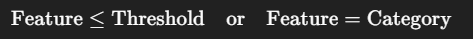

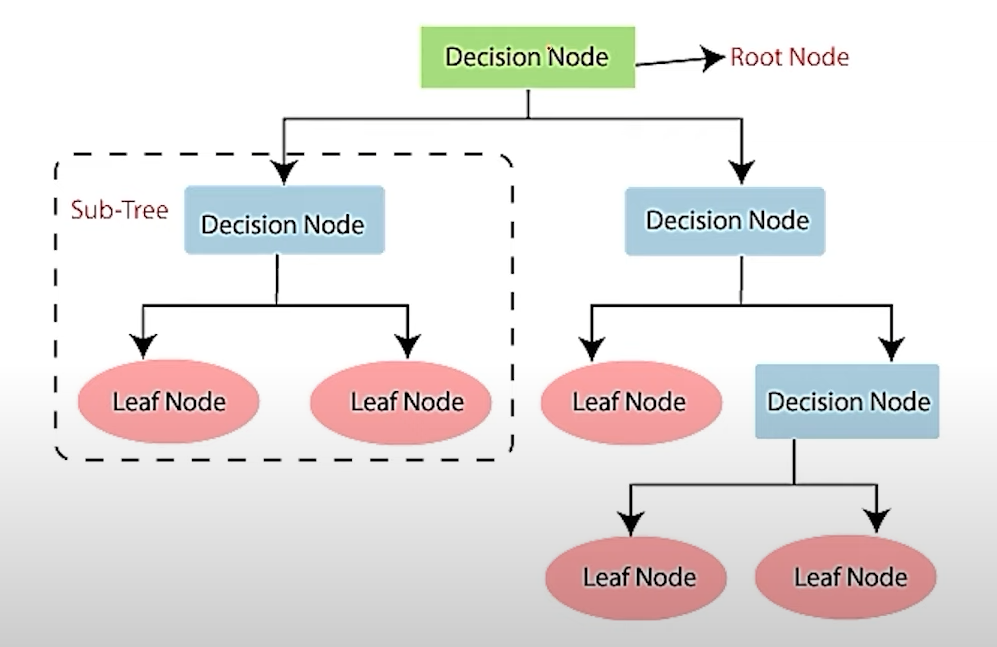

Root Node:
- It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting:
- It is a process of dividing a node into two or more sub-nodes.

Decision Node:
- When a sub-node splits into further sub-nodes, then ut is called the decision node.

Leaf/Terminal Node: 
- Nodes do not split is called Lead or Terminal node.

Pruning:
- When we remove sub-nodes of a decision node, this process is called Pruning.

Branch/Sub-Tree:
- A subsection of the entire tree is called branch or sub-tree.

Paresnt and Child Node:
- A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

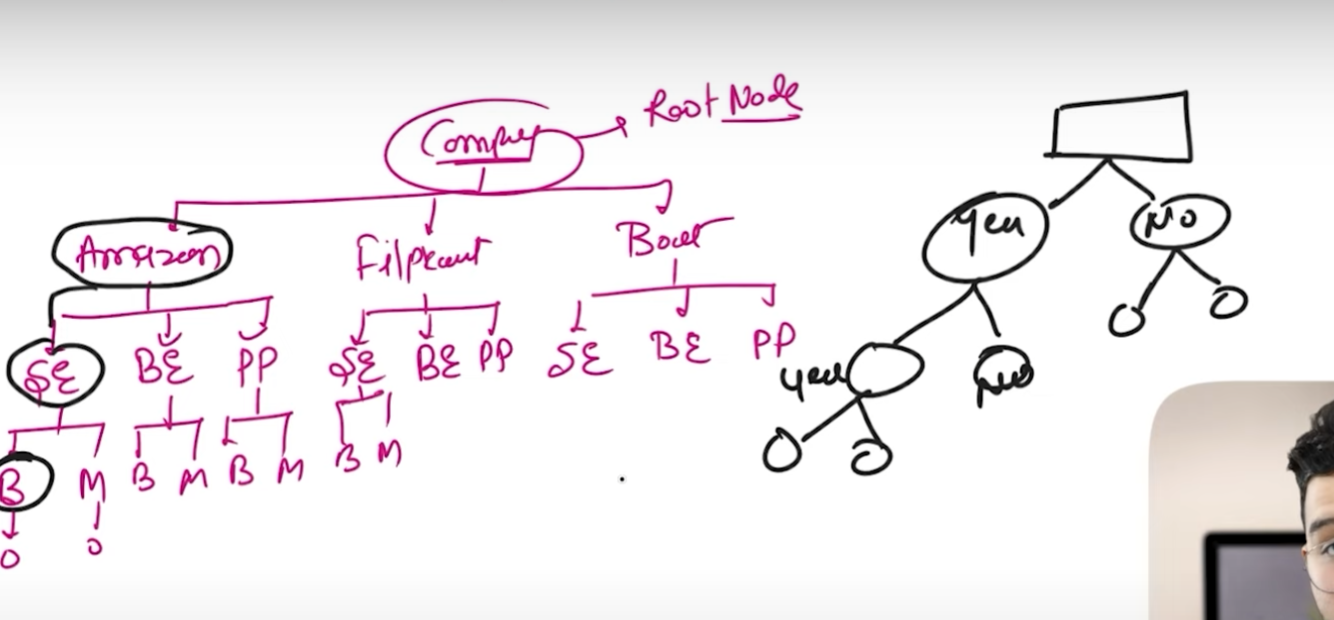

## Decision Tree Algorithm For Classification

- A Decision Tree Classifier is a supervised learning model used to predict a categorical target variable by learning decision rules from the input features.

It works like a flowchart:
- Internal nodes → conditions on features
- Leaves → class labels
- Branches → decision outcomes

### 3. How It Works: Step-by-Step
Let’s say you're predicting “Will a person buy a product?” based on:
- Age
- Salary
- Student (Yes/No)

-Step 1: Choose the best feature to split on
- Use Gini or Entropy to find the feature that best separates the classes.

-Step 2: Split the dataset into subsets
- Each split results in more “pure” groups (majority same class).

-Step 3: Repeat recursively
- Continue splitting each branch until:
- All records belong to one class, OR
- Max depth or min samples condition is reached

-Step 4: Final prediction
- Traverse the tree based on feature values and reach a leaf node with a class label.

#### 4. Splitting Criteria

- This measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:
- Information Gain
- Entropy, Gini Index

Low Entropy - high information gain ( jaha pe low entropy hogi vo ham pehle lenge tree banate vakt then baki badhme as respect to entropy)

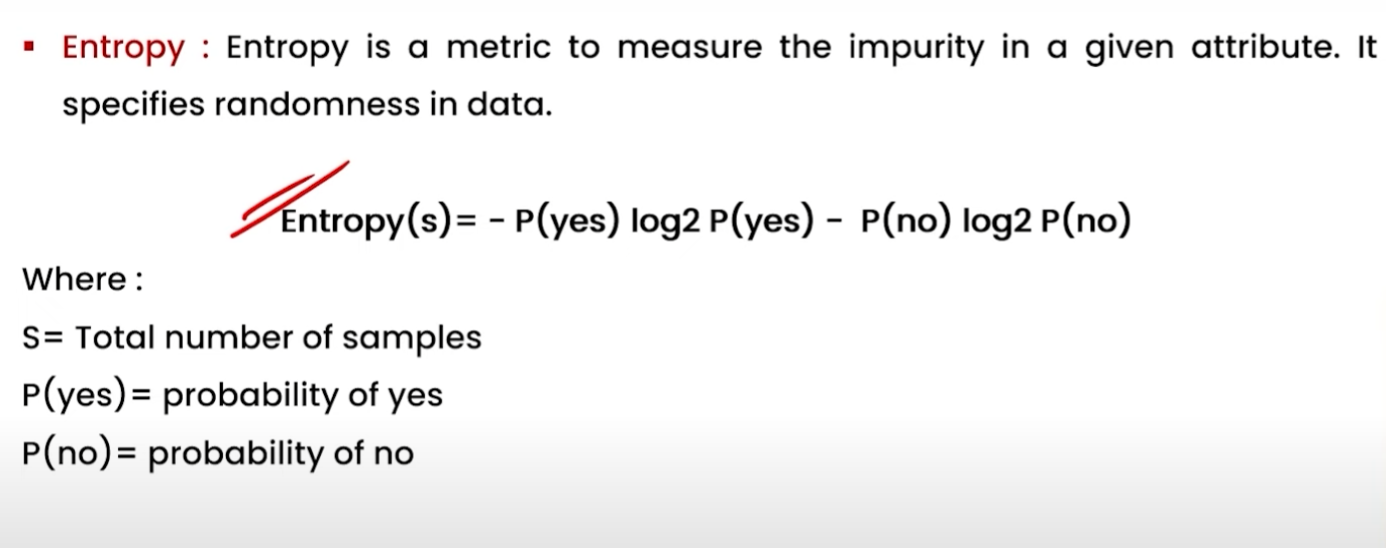

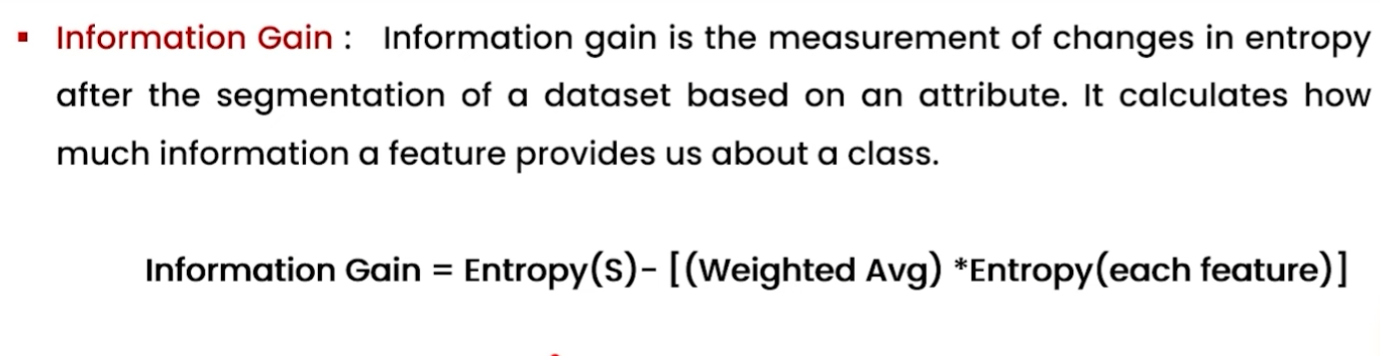

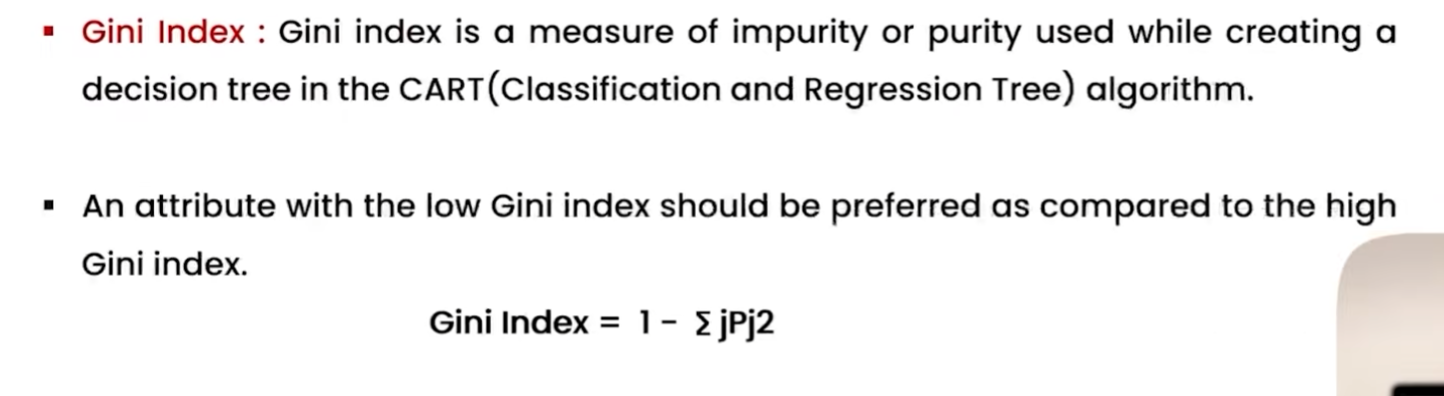

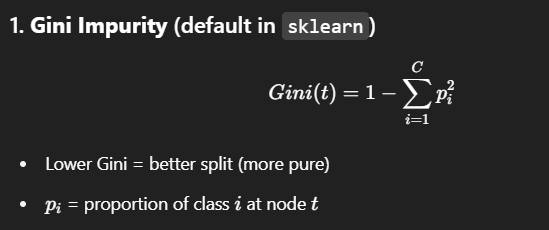
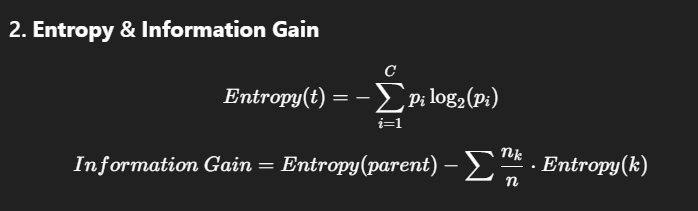

### Key Parameters

| Parameter           | Description                              |
| ------------------- | ---------------------------------------- |
| `criterion`         | Gini (default) or Entropy                |
| `max_depth`         | Maximum depth of tree                    |
| `min_samples_split` | Minimum samples required to split a node |
| `min_samples_leaf`  | Minimum samples required at a leaf       |
| `max_features`      | Number of features to consider per split |
| `ccp_alpha`         | Cost complexity pruning (post-pruning)   |

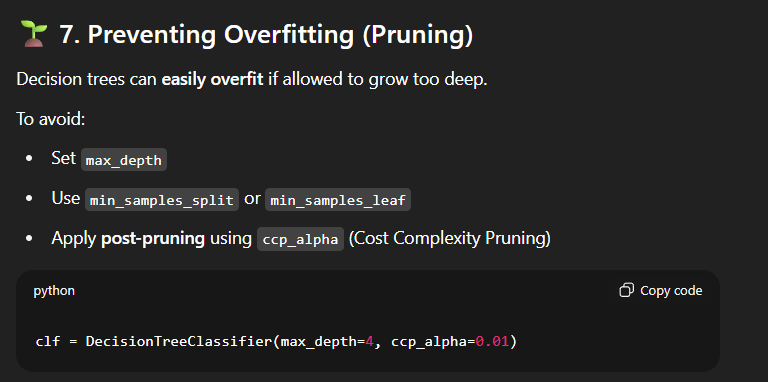

# Python Implementation (Iris Dataset)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



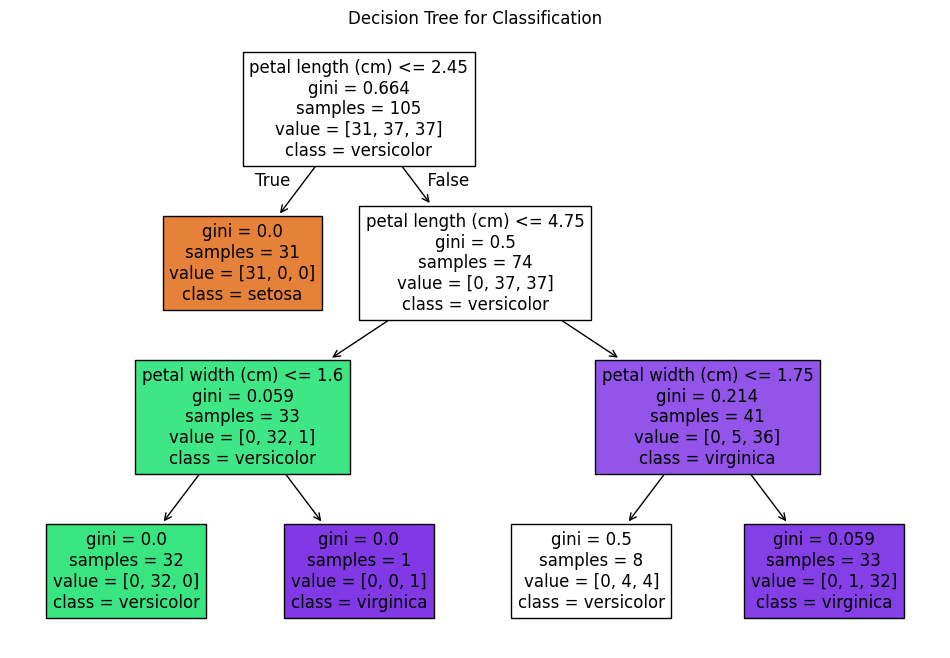

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load data
X, y = load_iris(return_X_y=True)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree (Gini by default)
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True,
          feature_names=load_iris().feature_names,
          class_names=load_iris().target_names)
plt.title("Decision Tree for Classification")
plt.show()

# Implementation From YouTube

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from mlxtend.plotting import plot_decision_regions

In [5]:
ds= pd.read_csv('Social_Network_Ads.csv')
ds.drop(columns=['User ID', 'Gender'], inplace=True)
ds.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


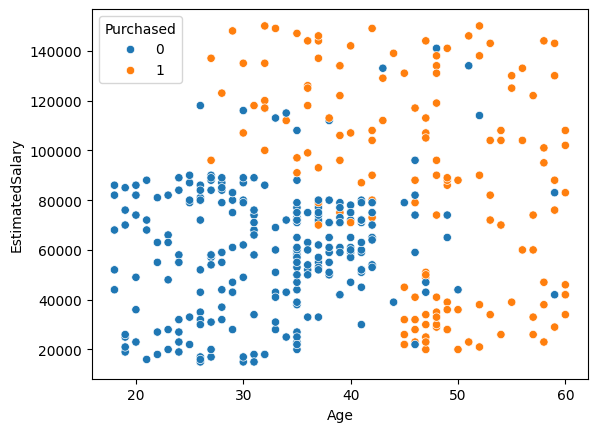

In [36]:
sns.scatterplot(x='Age', y='EstimatedSalary', data= ds, hue='Purchased')
plt.show()

In [6]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
x = ds.drop(columns=['Purchased'])
y = ds['Purchased']
x, y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [12]:
SDS = StandardScaler()
x_scalled = pd.DataFrame(SDS.fit_transform(x), columns=x.columns)
x_scalled

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [14]:
X_train, X_test, y_train, y_test = train_test_split(x_scalled, y, test_size=0.2, random_state=42)

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
model.score(X_test,y_test)*100

83.75

In [42]:
model.score(X_train,y_train)*100

99.6875

In [35]:
model1.score(X_test, y_test)*100

83.75

C:\Users\Dev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


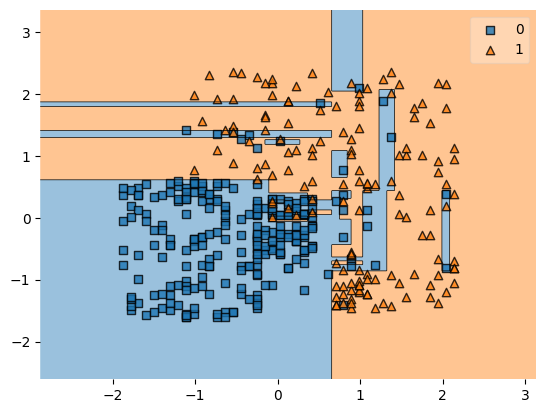

In [41]:
plot_decision_regions(x_scalled.to_numpy(), y.to_numpy(), clf=model) # it made an place proprely.
plt.show()

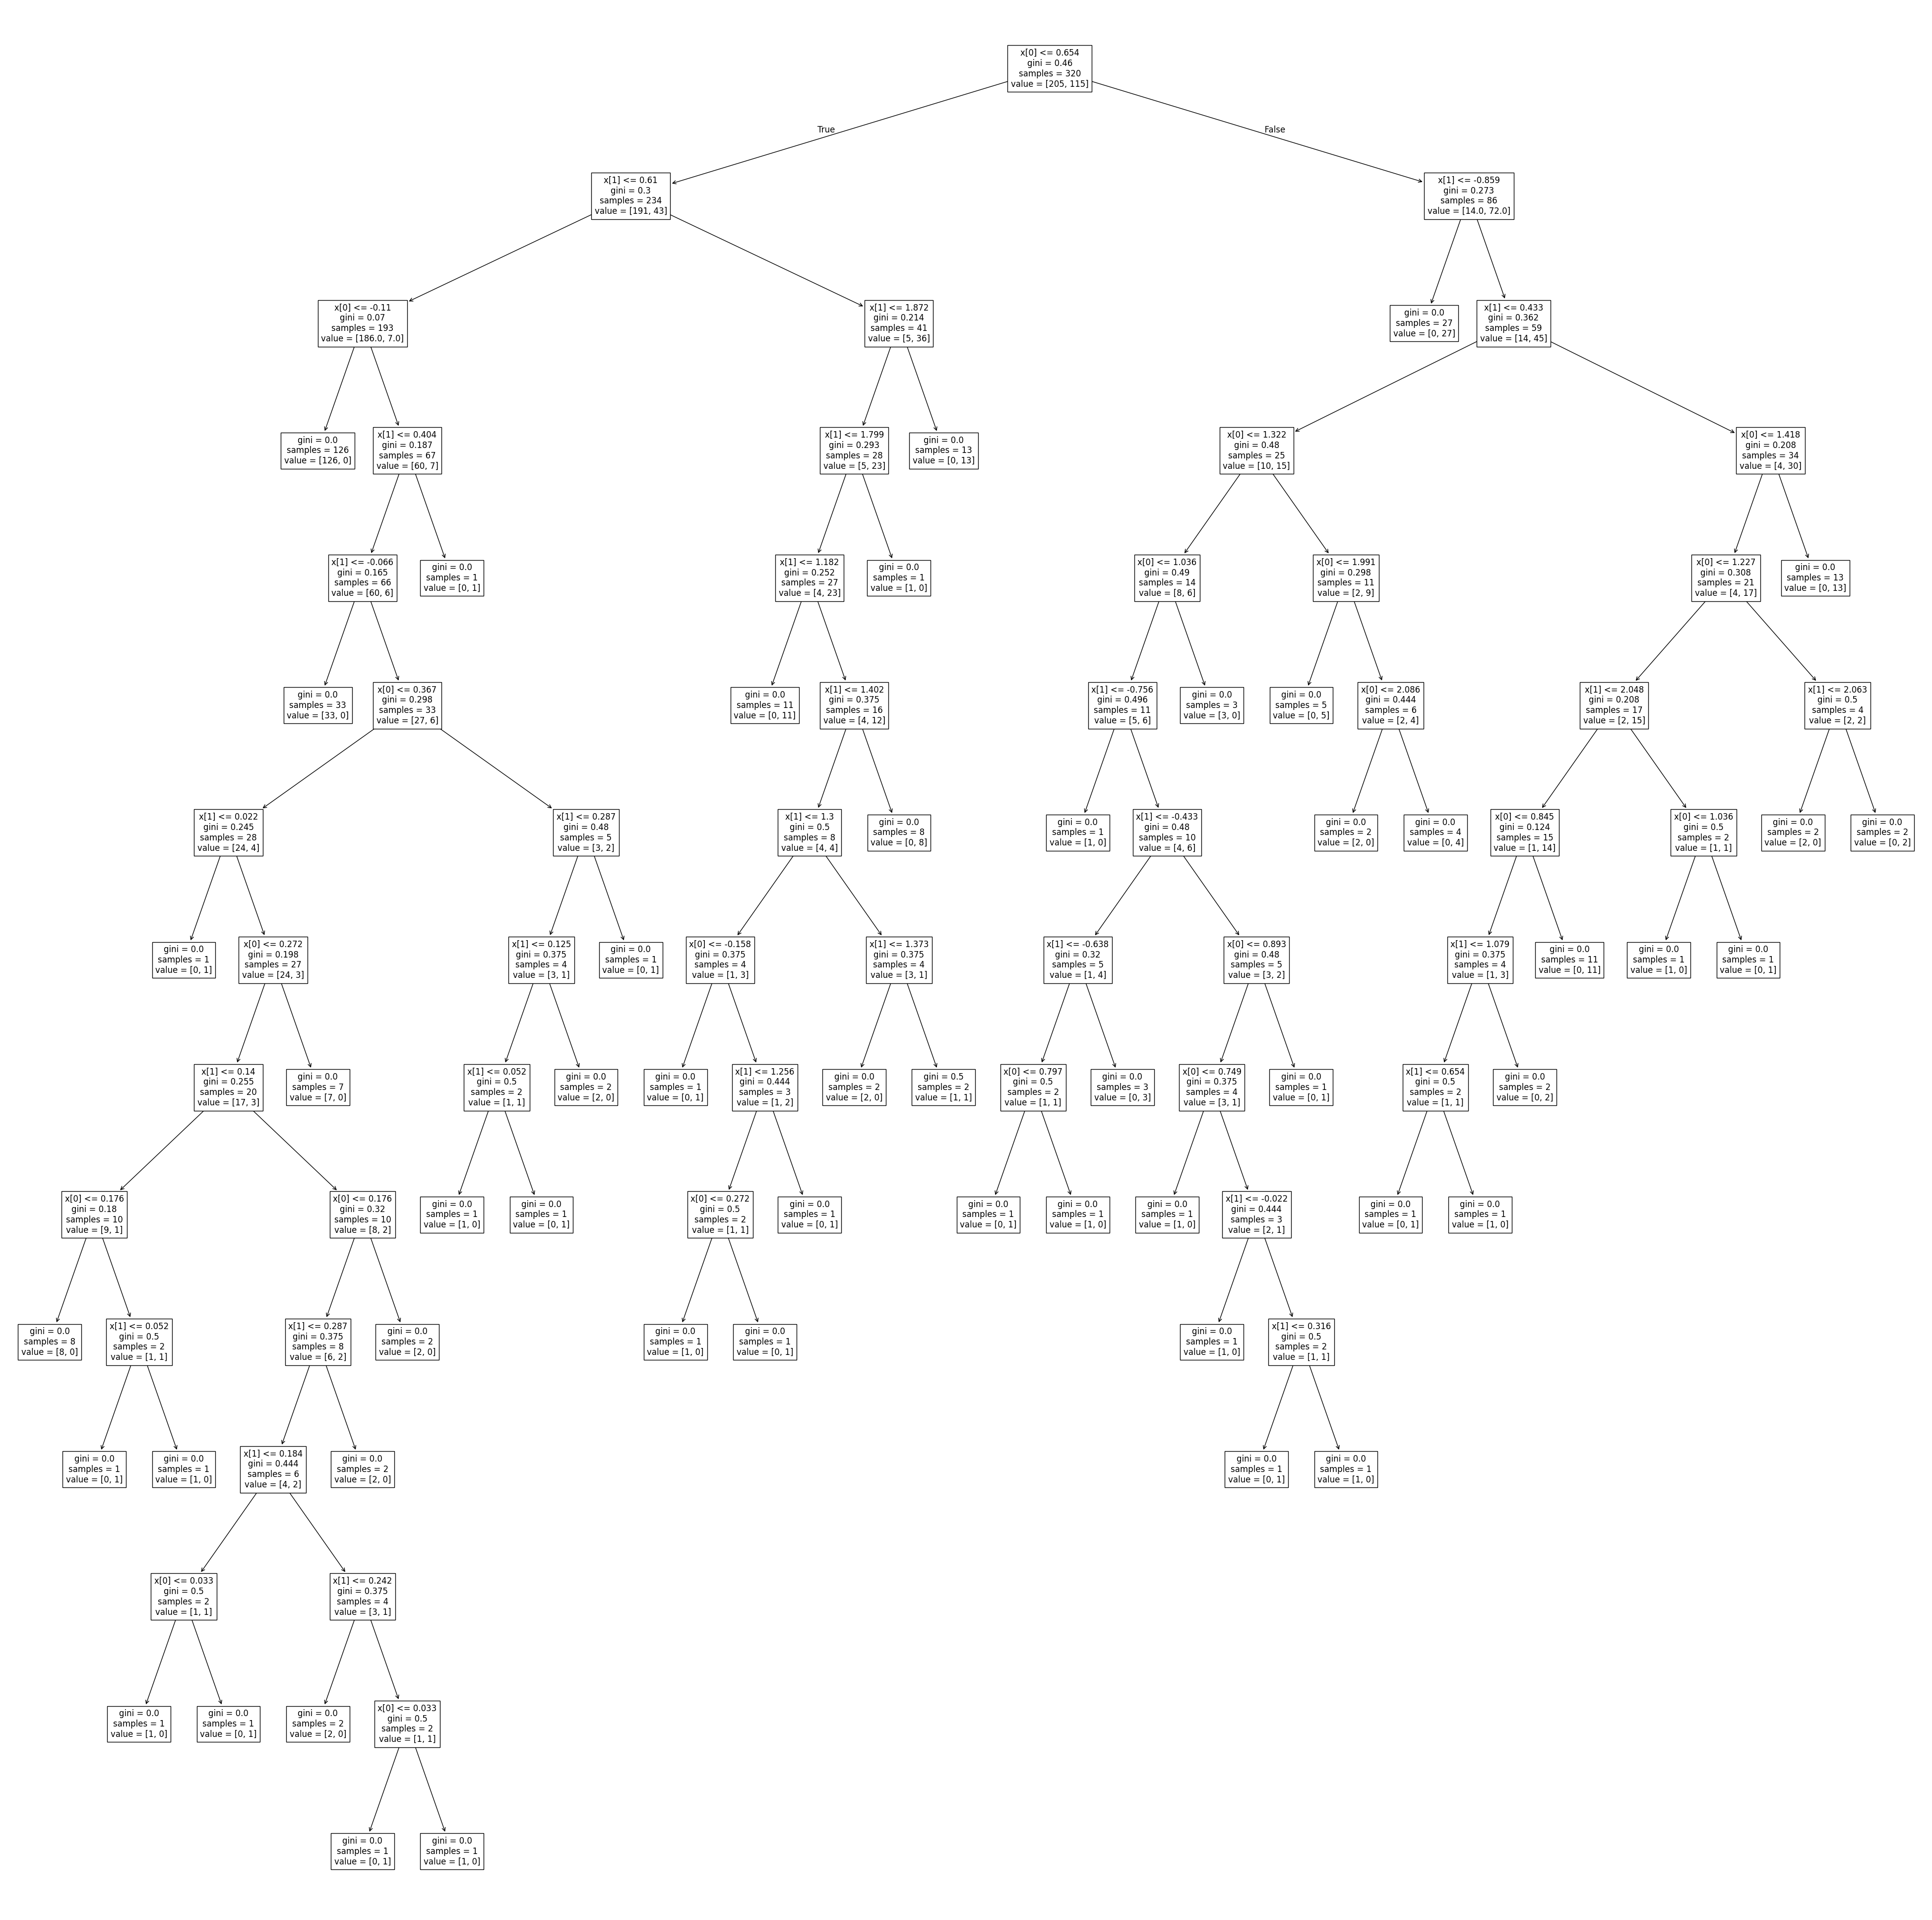

In [23]:
plt.figure(figsize=(50, 50))
plot_tree(model)
plt.show()